In [1]:
import tensorflow
import matplotlib.pyplot as plt
model = tensorflow.keras.models.load_model("model-gender")
gender=["female", "male"]

In [16]:
import numpy as np
import cv2

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_alt2.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
roi_gray=cv2.imread("download7.jpg")
cap = cv2.VideoCapture(0)
test_label=0
while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.putText(img, gender[test_label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255),2)

    test_data_img=roi_gray
    resized=cv2.resize(test_data_img,(48,48))
    test_data_img=np.array(resized)/255.0
    reshaped=np.reshape(test_data_img,(1,48,48,3))
    result=model.predict(reshaped)
    test_label=np.argmax(result,axis=1)[0]
    cv2.imshow("Gender Detection",img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

female


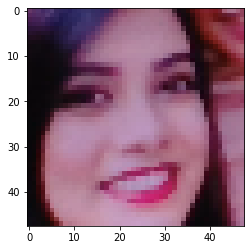

In [9]:
import os
test_data_img=roi_gray
resized=cv2.resize(test_data_img,(48,48))
test_data_img=np.array(resized)/255.0
reshaped=np.reshape(test_data_img,(1,48,48,3))
result=model.predict(reshaped)
test_label=np.argmax(result,axis=1)[0]

plt.imshow(test_data_img)
data_path='Training'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))
label_dict
for i,j in label_dict.items():
    if j==test_label:
        print(i)

male


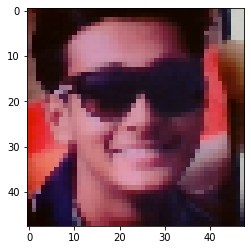

In [17]:
import os
test_data_img=roi_gray
resized=cv2.resize(test_data_img,(48,48))
test_data_img=np.array(resized)/255.0
reshaped=np.reshape(test_data_img,(1,48,48,3))
result=model.predict(reshaped)
test_label=np.argmax(result,axis=1)[0]

plt.imshow(test_data_img)
data_path='Training'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))
label_dict
for i,j in label_dict.items():
    if j==test_label:
        print(i)